In [1]:
RUN = 6

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<b>Note:</b> the raw code for this notebook is by default hidden for easier reading.
To toggle the code on/off, click <a href="javascript:code_toggle()">here</a>.''')

# Setup

In [3]:
import torch
import Darwin as dw
import seaborn as sns

from torchvision import datasets, transforms
from bogus import atk
from ipywidgets  import interactive, fixed
from bokeh.io import output_notebook

output_notebook()
sns.set()

Loading BokehJS ...

In [4]:
with open(r"D:\TELEGRAM_BOTS\NEURALUPDATES.txt") as file: #Credentials for telegram bot
    telegram_credentials = file.read().split('\n')

In [5]:
transform = transforms.Compose([
                       transforms.ToTensor()])

MNIST_train = datasets.MNIST(r'D:\Data_sets/MNIST', 
                            train=True, download=True,
                            transform=transform)

MNIST_test = datasets.MNIST(r'D:\Data_sets/MNIST', 
                            train=False, download=True,
                            transform=transform)

train_loader = torch.utils.data.DataLoader(
                            MNIST_train, batch_size=64, 
                            shuffle=True, pin_memory=True)

test_loader = torch.utils.data.DataLoader(MNIST_test,
                            batch_size=1000, shuffle=True, 
                            pin_memory=True)

In [6]:
NET_SPACE = {
    'nb_layers': {'lb': 1, 'ub': 3, 'mutate': 0.15},
    'lr': {'lb': 0.001, 'ub':0.1, 'mutate': 0.15},
    'weight_decay': {'lb': 0.00001, 'ub': 0.0004, 'mutate':0.2},
    'optimizer': {'func': ['sgd', 'adam', 'adadelta','rmsprop'], 'mutate': 0.2}
}

In [7]:
LAYER_SPACE = {
    'nb_units':{'lb': 128, 'ub':2048, 'mutate': 0.15},
    'dropout_rate': {'lb': 0.0, 'ub': 0.7, 'mutate': 0.2},
    'activation': {'func': ['linear','tanh','relu','sigmoid','elu'], 'mutate':0.2}
}

In [8]:
atk_func = atk()

# Run 

In [9]:
testing = dw.TournamentOptimizer(3, LAYER_SPACE, NET_SPACE, dw.randomize_network, 
                           dw.mutate_net, dw.NetFromBuildInfo, dw.train, dw.test,
                          train_loader, test_loader, atk_func.fgsm, telegram_credentials, RUN=RUN)

In [10]:
testing.step(generations=2, epochs=1, save=True, phone=False)

directory created:  D:\Models\NeuroEvolution/Run6
Generation 1 Population mean:344.0 max:1032

Top performers:
0: score:1032
1: score:0


Generation 2 Population mean:670.6666666666666 max:1032

Top performers:
0: score:1032
1: score:980



# Plots

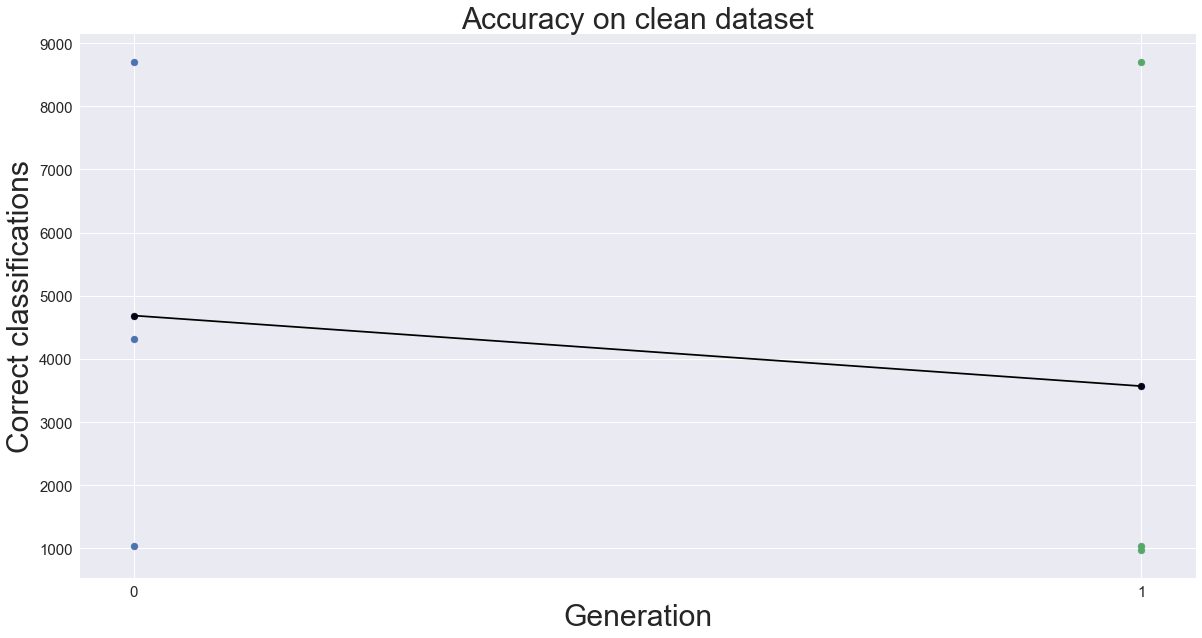

In [11]:
dw.progressplotter(testing, clean=True)

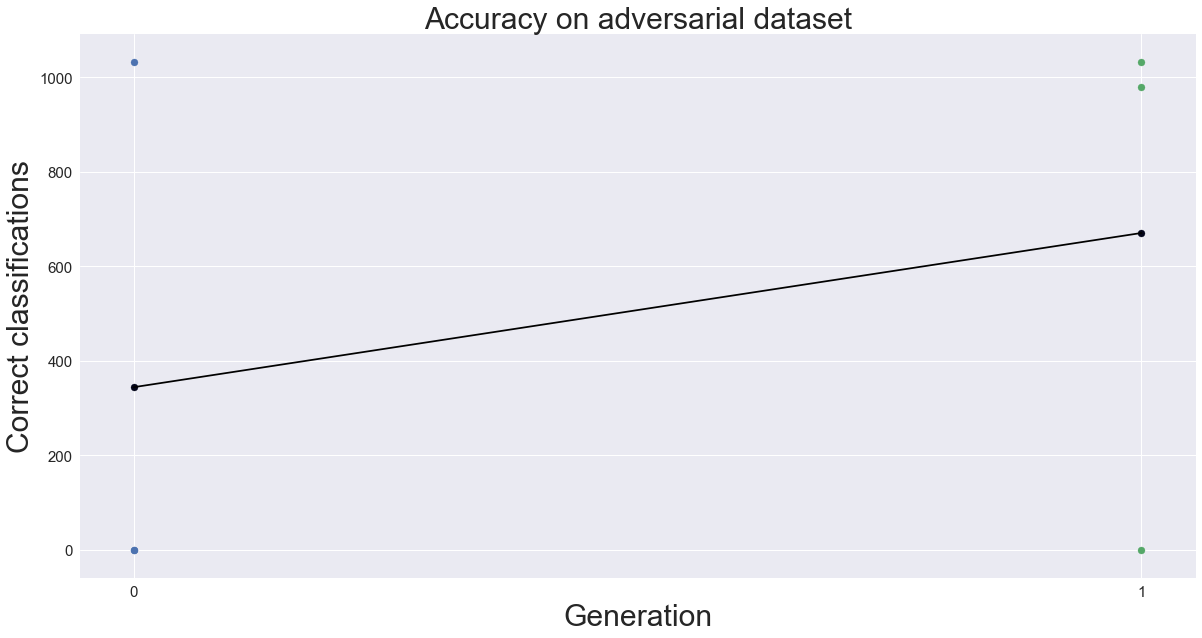

In [12]:
dw.progressplotter(testing)

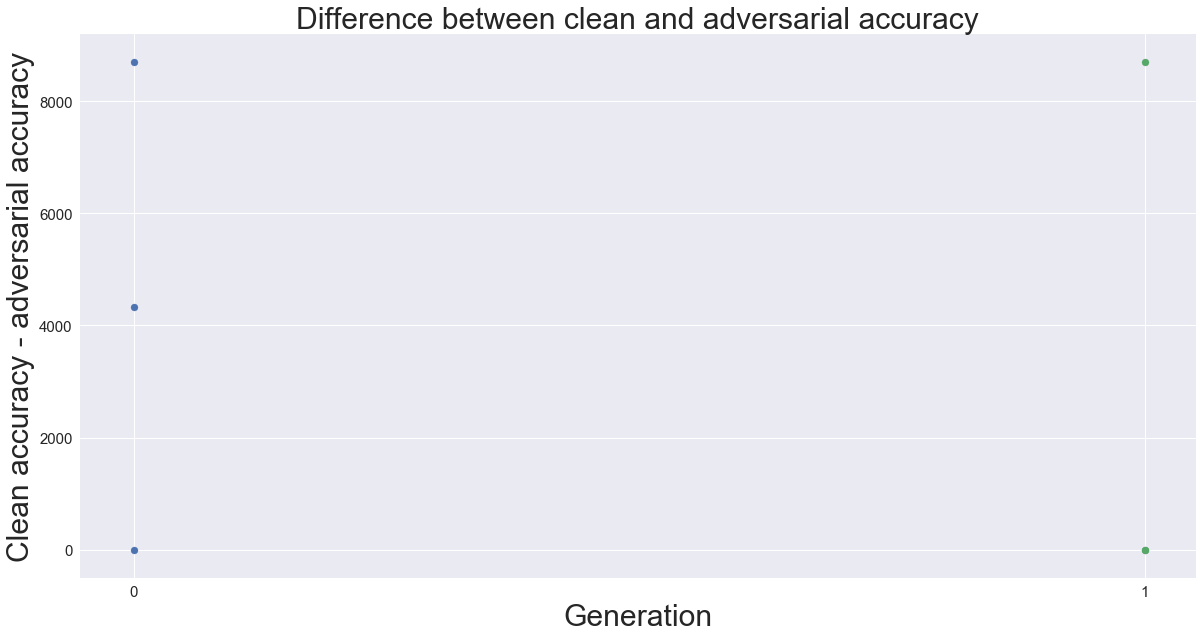

In [13]:
dw.diffplotter(testing)

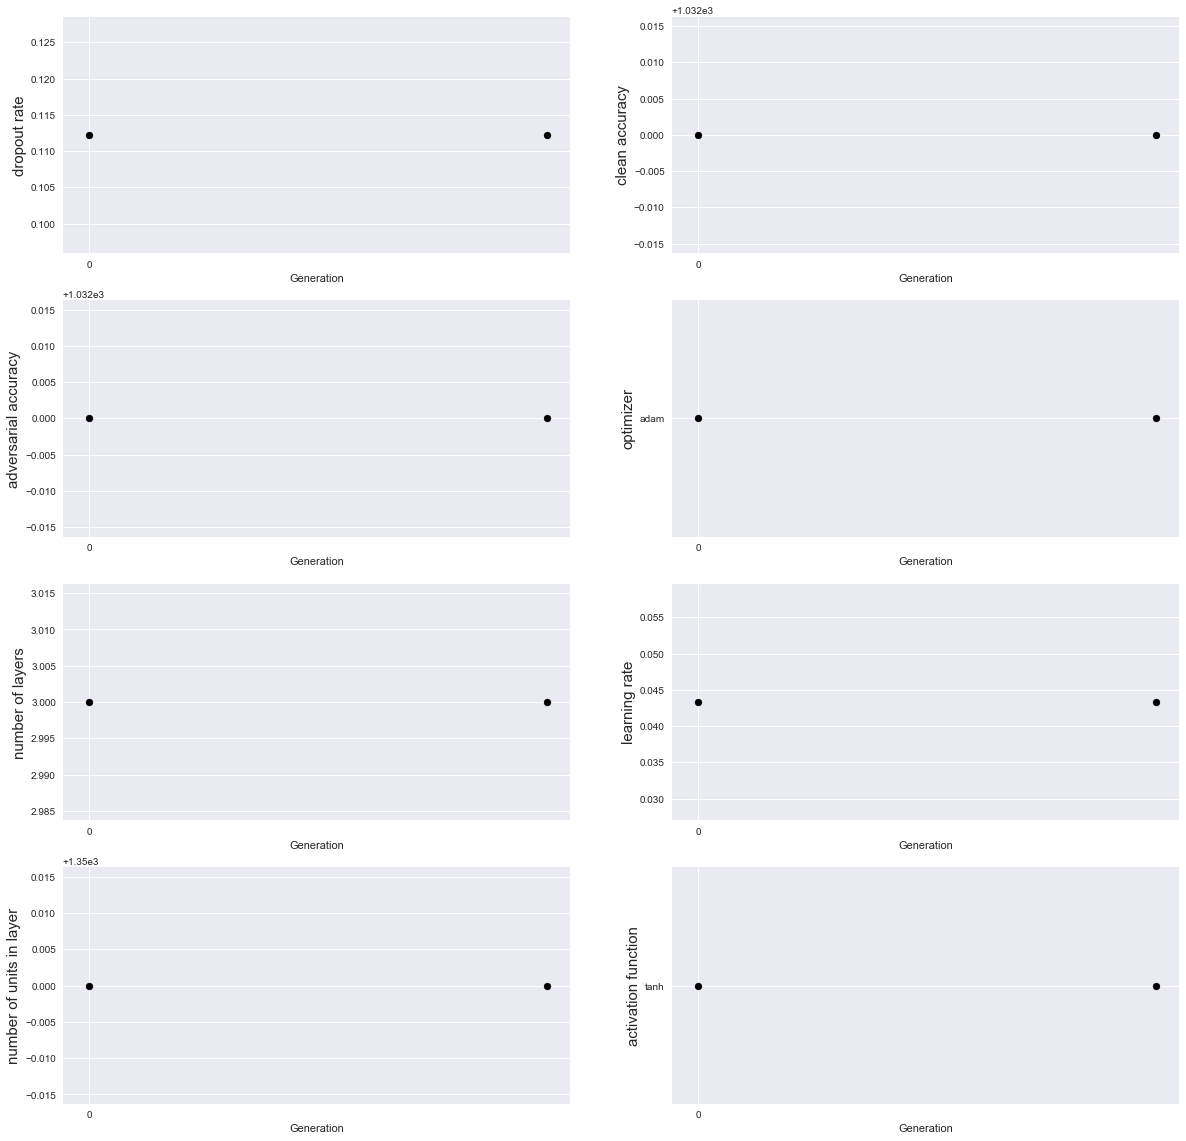

In [14]:
dw.bestplotter(testing, k=0)

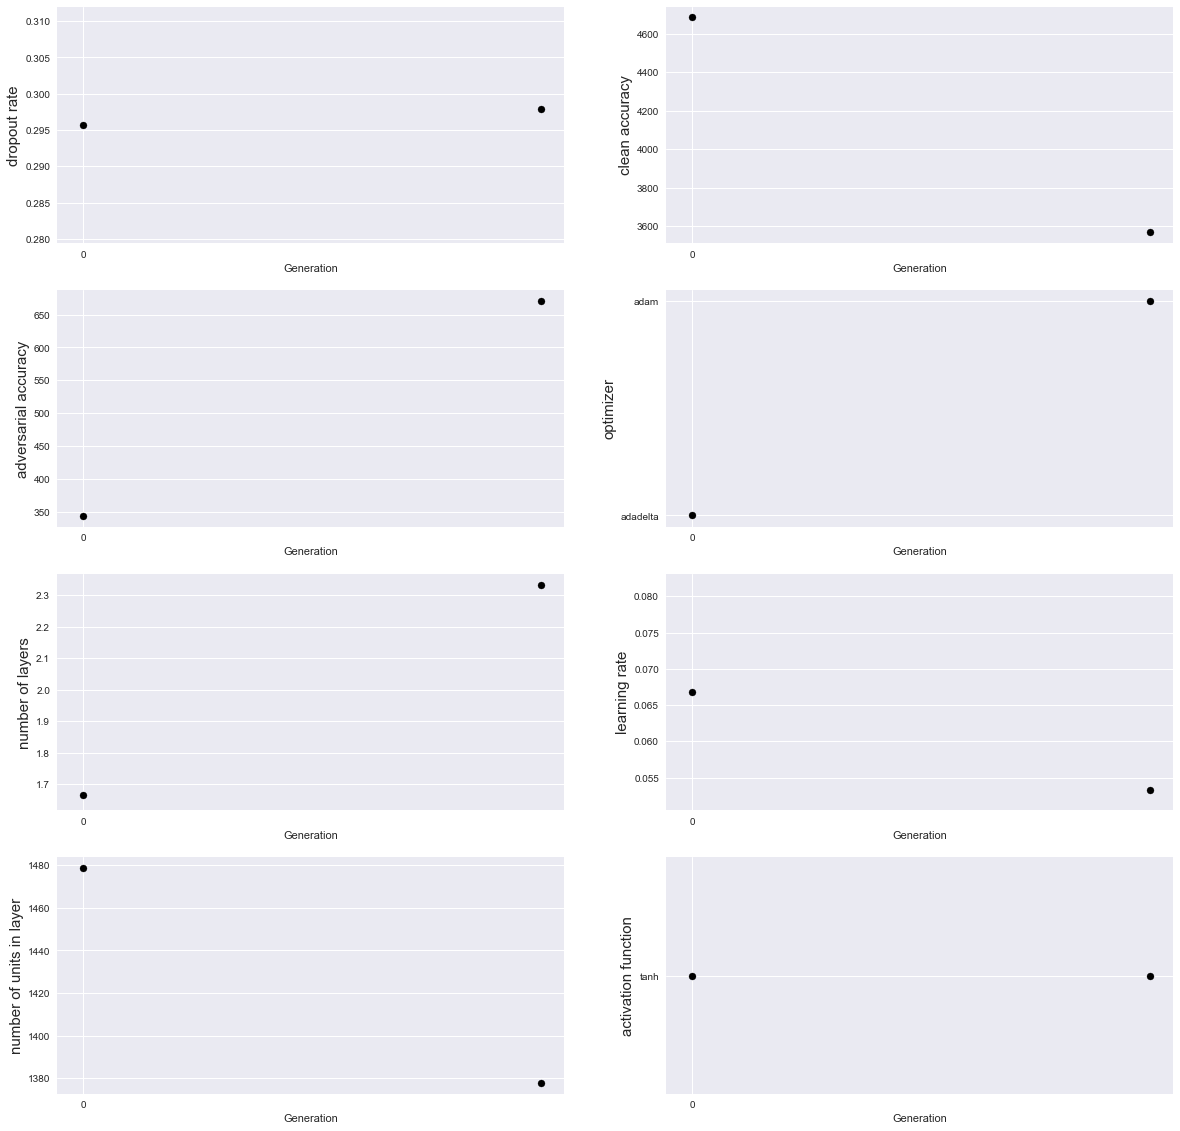

In [15]:
dw.avgplotter(testing)

In [16]:
dw.best_printer(testing, RUN)

,adversarial,clean,generation
best_adversarial,1032,1032,1
best_clean,0,8704,1


Showing best model which was found in generation 1
Clean accuracy = 1032
adversarial accuracy =1032

Model: 

 NetFromBuildInfo(
  (model): Sequential(
    (flatten): Flatten()
    (fc_0): Linear(in_features=784, out_features=1350, bias=True)
    (dropout_0): Dropout(p=0.11224621809329507)
    (tanh0): Tanh()
    (fc_1): Linear(in_features=1350, out_features=1401, bias=True)
    (dropout_1): Dropout(p=0.698638506040962)
    (fc_2): Linear(in_features=1401, out_features=1154, bias=True)
    (dropout_2): Dropout(p=0.4970123269333826)
    (relu2): ReLU()
    (logits): Linear(in_features=1154, out_features=10, bias=True)
  )
) 

 Images below are adversarial
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


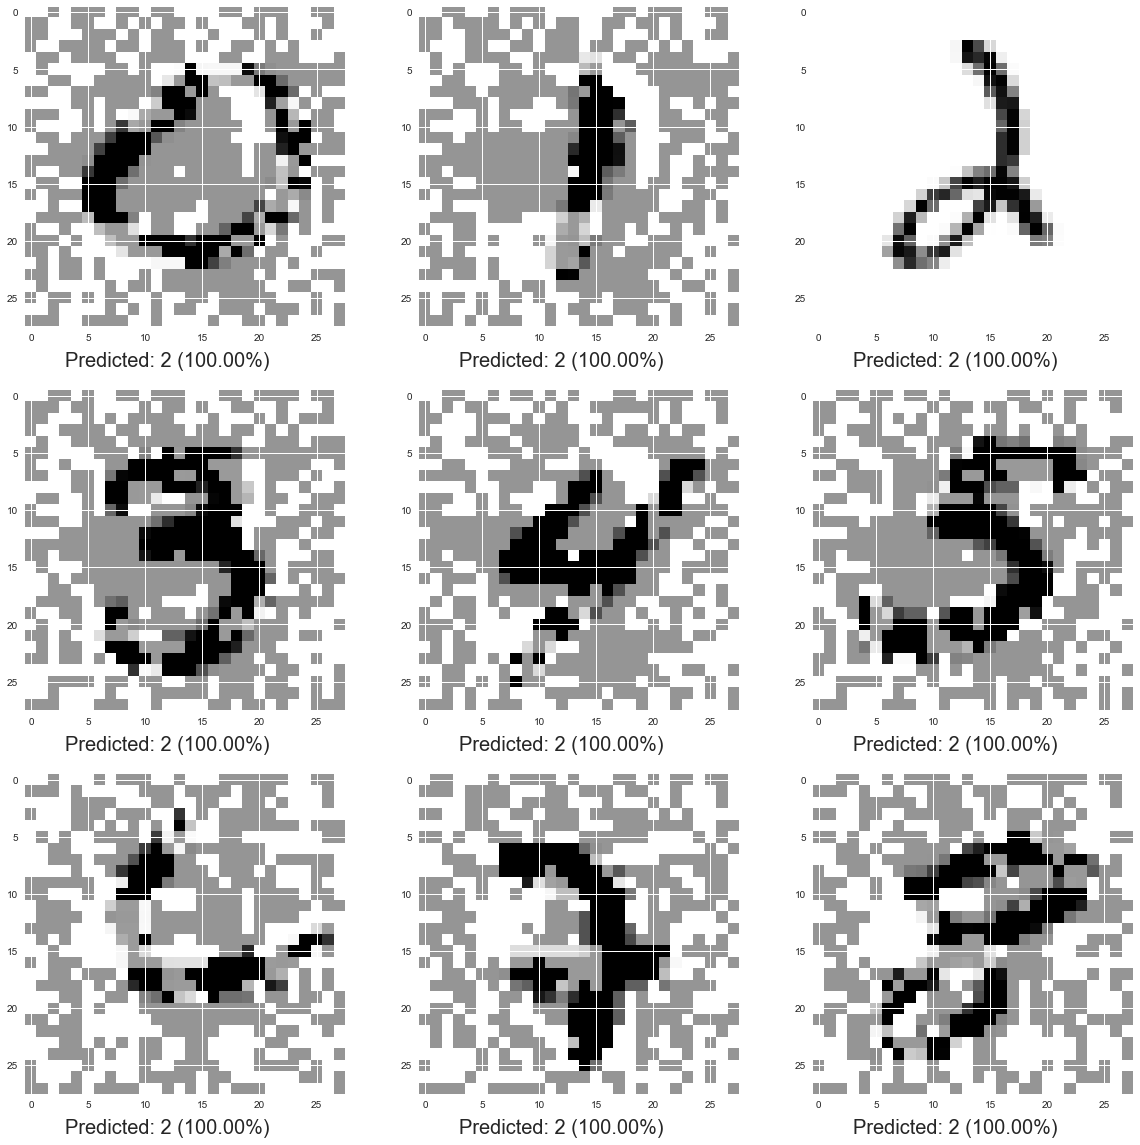

In [17]:
dw.multi_plot(testing, test_loader, RUN, adv_func=atk_func.fgsm, adversarial=True, eps=0.5)

Showing best model which was found in generation 1
Clean accuracy = 1032
adversarial accuracy =1032

Model: 

 NetFromBuildInfo(
  (model): Sequential(
    (flatten): Flatten()
    (fc_0): Linear(in_features=784, out_features=1350, bias=True)
    (dropout_0): Dropout(p=0.11224621809329507)
    (tanh0): Tanh()
    (fc_1): Linear(in_features=1350, out_features=1401, bias=True)
    (dropout_1): Dropout(p=0.698638506040962)
    (fc_2): Linear(in_features=1401, out_features=1154, bias=True)
    (dropout_2): Dropout(p=0.4970123269333826)
    (relu2): ReLU()
    (logits): Linear(in_features=1154, out_features=10, bias=True)
  )
) 

 Images below are clean
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


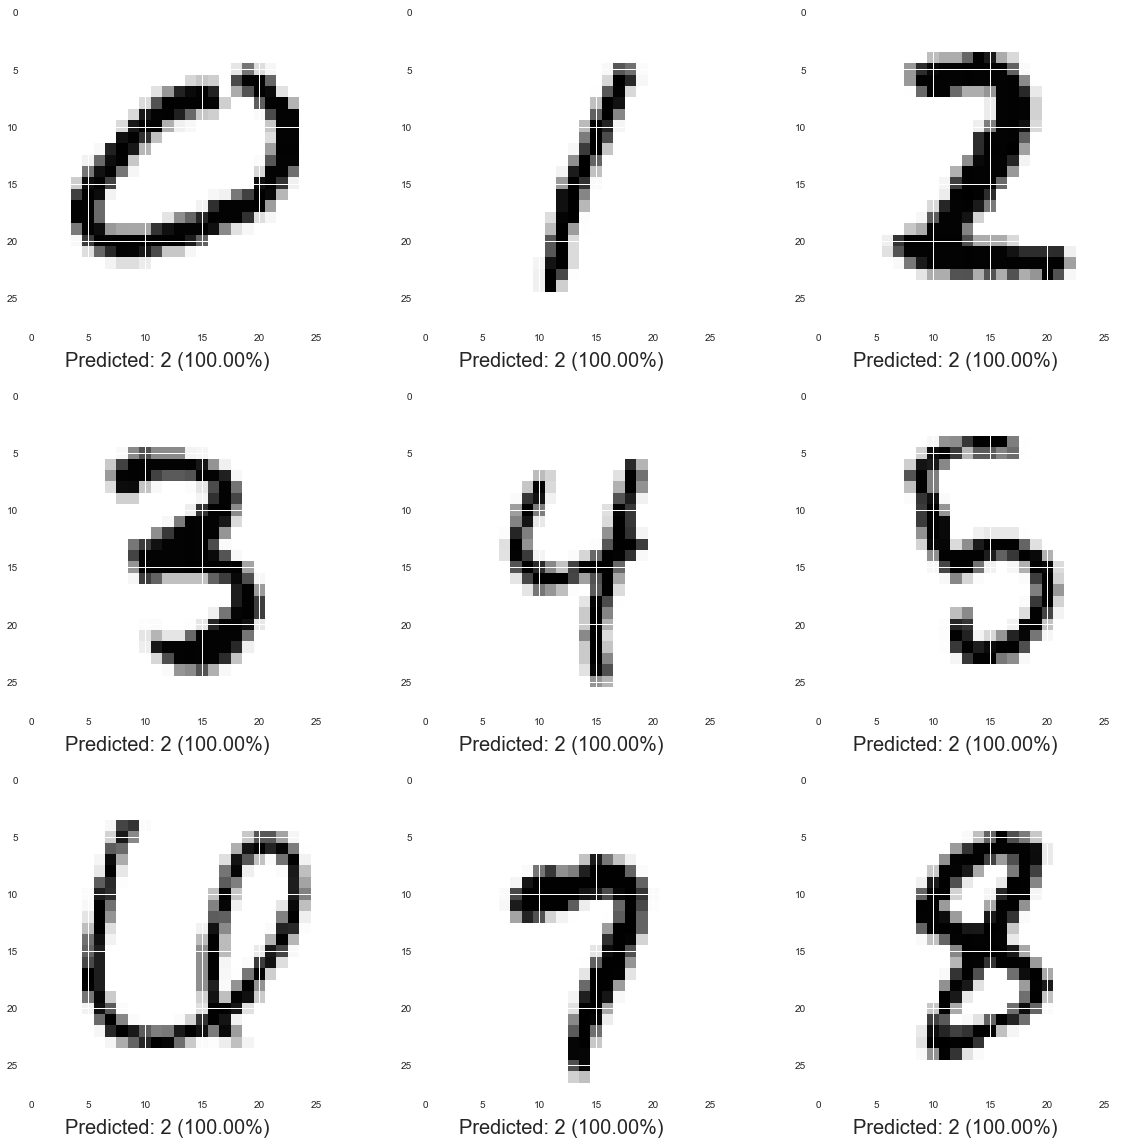

In [18]:
dw.multi_plot(testing, test_loader, RUN, adversarial=False)

In [19]:
df = dw.dataframer(testing)
df.to_pickle(r"../data/neuroevolution{}".format(RUN))

In [20]:
opts = df.columns.tolist()[:-1] #last column contains dicts which causes bokeh to fail
gen_opts = ['all'] + df['Generation'].unique().tolist() 
y1_opts = opts[2:] + opts[:2]
y2_opts = opts[1:] + opts[:1]
interactive_plot = interactive(dw.int_plot, df=fixed(df), x=opts, y=y1_opts, x2=opts, y2=y2_opts, gen=gen_opts)

In [21]:
interactive_plot #bokeh does not show on Github due to JS restrictions

interactive(children=(Dropdown(description='x', options=('Generation', 'Clean', 'Adversarial', 'No_layers', 'L…

# Debugging

In [22]:
model = dw.rebuild_from_save(0,generation=38,position=4,run=1, oldrun=True)

{'nb_layers': 1, 'weight_decay': 0.0002442487687208515, 'optimizer': 'adadelta', 'layers': [{'dropout_rate': 0.5920481211841264, 'nb_units': 1331, 'activation': 'linear'}], 'lr': 0.05184926115229526}


In [23]:
dw.test(model, test_loader)

(0.001753286861699102, 8491)

In [24]:
dw.test(model, test_loader, adversarial=True, adv_func=atk_func.fgsm, eps=0.1)

(0.002161438935789422, 2741)

[[0.00564477 0.0037141  0.00317335 0.05355636 0.01457628 0.27981865
  0.01049928 0.00159851 0.61223489 0.0151838 ]]
[[1.69400210e-02 1.23781129e-04 8.63793314e-02 3.37723913e-03
  3.28740983e-03 2.50198333e-03 6.52964188e-03 4.85380702e-04
  8.77819350e-01 2.55586183e-03]]
[[0.00224847 0.01400341 0.0068075  0.02269578 0.05375343 0.00807763
  0.0155962  0.00269198 0.82473701 0.04938859]]
[[1.30522079e-02 8.32950800e-04 1.02759447e-03 8.21951275e-04
  9.20062419e-02 1.10797834e-02 2.34612948e-02 9.86339616e-05
  8.25502315e-01 3.21170262e-02]]
[[2.74888659e-02 2.30560777e-03 2.25593048e-01 1.65527256e-01
  3.10199662e-04 4.99497252e-03 3.43616910e-03 6.17717710e-03
  5.43758434e-01 2.04082697e-02]]
[[0.68441838 0.00113327 0.00694118 0.12453304 0.00356929 0.00346935
  0.00286419 0.00924918 0.07195274 0.09186937]]
[[2.60893935e-03 1.49362627e-04 5.68417375e-01 9.98871549e-03
  8.75616688e-04 8.15821374e-04 7.46970333e-03 9.62164286e-05
  4.06726373e-01 2.85187630e-03]]
[[7.84688411e-04 1.1

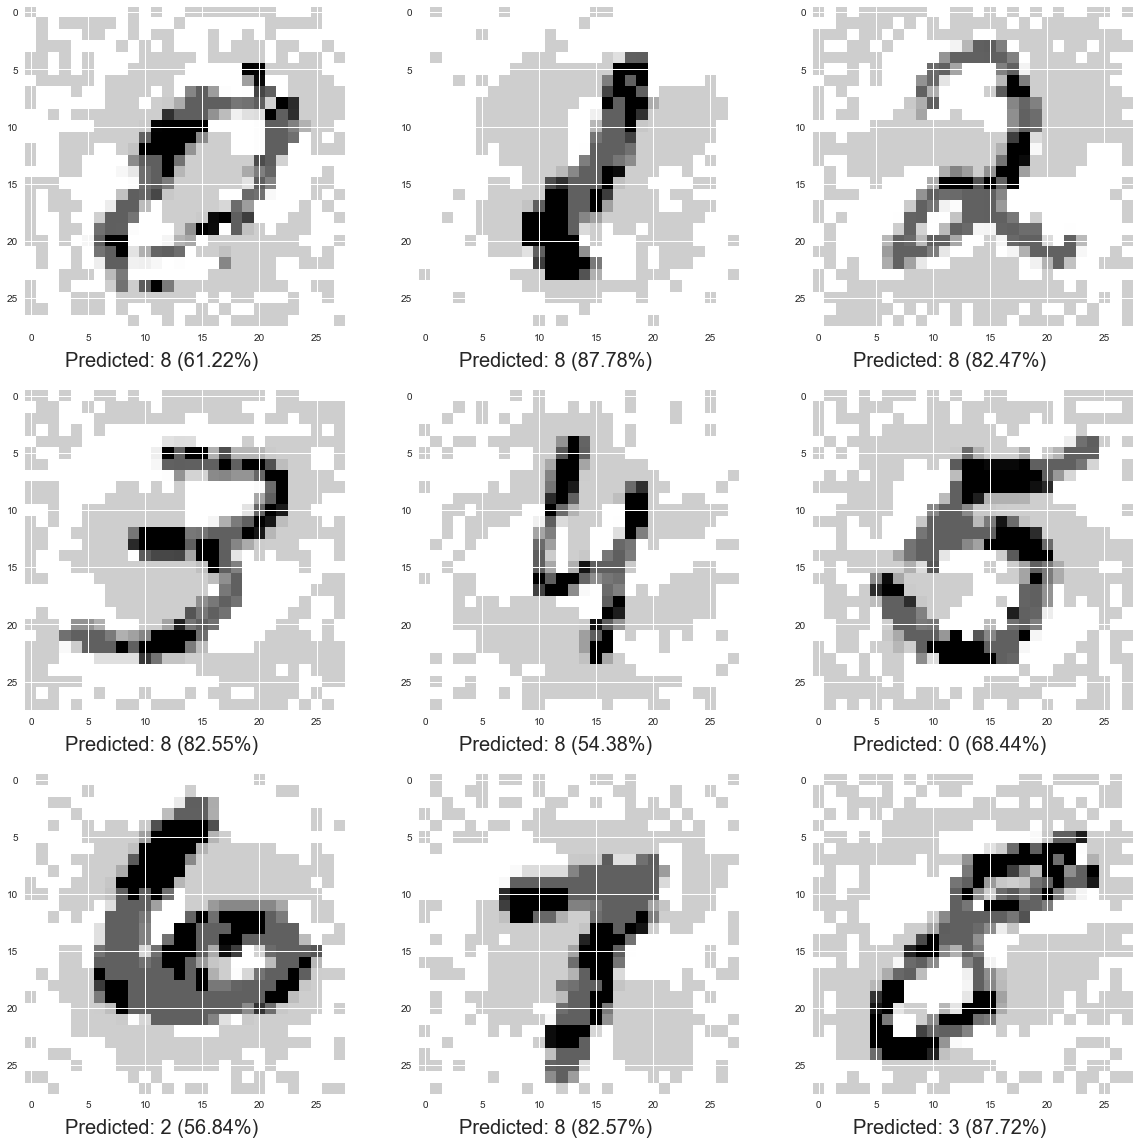

In [25]:
dw.multi_plot(testing, test_loader, RUN, adv_func=atk_func.fgsm, adversarial=True, eps=0.3, model=model)

In [26]:
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [27]:
batch = next(iter(test_loader))
img = batch[0][0].data
label = batch[1][0]

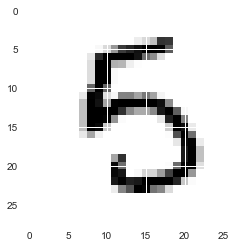

In [28]:
plt.imshow(img.numpy().reshape(28,28), cmap='Greys')

In [29]:
label

tensor(5)

clean softmax =  tensor([[ 0.0673,  0.0006,  0.0062,  0.0434,  0.1263,  0.3664,  0.0556,
          0.0004,  0.3237,  0.0099]], dtype=torch.float64, device='cuda:0') 5 0.36642803487777836 

clean logits =  tensor([[ 0.9243, -3.7524, -1.4550,  0.4860,  1.5536,  2.6188,  0.7335,
         -4.2469,  2.4949, -0.9892]], dtype=torch.float64, device='cuda:0') 5 2.6187904884644895 

logits = tensor([[ -3.1076,   1.0979,  -0.1502,  -1.7398,   7.4777, -11.7541,
           2.9497,   0.3165,   4.1329,   5.2318]], dtype=torch.float64, device='cuda:0') 4 7.477736976826985 

softmax = tensor([[ 2.1891e-05,  1.4679e-03,  4.2136e-04,  8.5962e-05,  8.6582e-01,
          3.8472e-09,  9.3522e-03,  6.7194e-04,  3.0535e-02,  9.1624e-02]], dtype=torch.float64, device='cuda:0') 4 0.865820117123027 



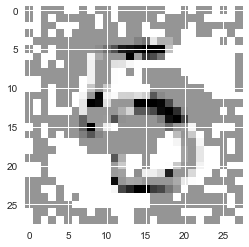

In [30]:
grads = {}

def save_grad(name):  #closure for use as a hook in fgsm attack - otherwise gradients can't be obtained for images. 
    def hook(grad):
        grads[name] = grad
    return hook

x = Variable(img, requires_grad=True).cuda().double()
x.register_hook(save_grad('grad'))
h_adv = model.logits_forward(x)
h = model(x)
h_logs = model.logits_forward(x)
print('clean softmax = ', h.data, h.argmax().item(), h.max().item(), '\n')
print('clean logits = ', h_logs, h_logs.argmax().item(), h_logs.max().item(), '\n')
h_adv.shape
h_adv
h_adv.max()
criterion = torch.nn.CrossEntropyLoss()
cost = criterion(h_adv, label.cuda().view(1))
cost.backward()
imge = (img.double() + grads['grad'].cpu().sign().double() *0.5)
logits = model.logits_forward(imge.cuda())
print('logits =', logits.data, logits.argmax().item(), logits.max().item(), '\n')
soft = model(imge.cuda())
print('softmax =', soft.data, soft.argmax().item(), soft.max().item(), '\n')
imge = imge.cpu().numpy().reshape(28,28)
plt.imshow(imge ,cmap='Greys')